# Moving Average Crossover Strategy
 Concept: Buy when a short-term moving average (e.g., 10-day MA) crosses above a long-term moving average (e.g., 50-day MA), and sell when it crosses below.

* Type: Trend-following

* Assets: Stocks, ETFs, crypto

* Pros: Simple, widely used

* Cons: Can produce whipsaws in sideways markets



## Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import yfinance as yf
from datetime import date

%load_ext autoreload
%autoreload 2

## Load Data From YFinance

In [2]:
df_aapl = yf.download('AAPL', start='2020-01-01')

df_aapl = df_aapl.droplevel(axis=1, level=1)

df_aapl.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,72.620842,72.681289,71.373218,71.627092,135480400
2020-01-03,71.914825,72.676454,71.689965,71.847125,146322800
2020-01-06,72.487862,72.526549,70.783263,71.034724,118387200
2020-01-07,72.146942,72.753823,71.926915,72.497529,108872000
2020-01-08,73.307518,73.609752,71.849540,71.849540,132079200


## Developing the Strategy

### Generate Trading Signals

In [3]:
# Short Signal
df_aapl['SMA50'] = df_aapl['Close'].rolling(window=50).mean()

# Long Signal
df_aapl['SMA200'] = df_aapl['Close'].rolling(window=200).mean()

# Drop rows where signals are missing due to lack of data
df_aapl.dropna(inplace=True)

df_aapl.head()

Price,Close,High,Low,Open,Volume,SMA50,SMA200
Date,,,,,,,
2020-10-15,117.550018,118.027189,115.057037,115.612115,112559200,113.858164,86.063326
2020-10-16,115.904266,118.368042,115.699765,118.105106,115393800,113.961827,86.279743
2020-10-19,112.943832,117.267595,112.632210,116.819638,120639300,114.056629,86.484888
2020-10-20,114.433792,115.865311,112.603003,113.158081,124423700,114.149775,86.694618
2020-10-21,113.810547,115.602375,113.401536,113.615778,89946000,114.295751,86.902936


In [4]:
# If the short signal rises above the long signal, then we are in a buying position
df_aapl['Signal'] = (df_aapl['SMA50'] > df_aapl['SMA200']) * 1

df_aapl.head()

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal
Date,,,,,,,,
2020-10-15,117.550018,118.027189,115.057037,115.612115,112559200,113.858164,86.063326,1
2020-10-16,115.904266,118.368042,115.699765,118.105106,115393800,113.961827,86.279743,1
2020-10-19,112.943832,117.267595,112.632210,116.819638,120639300,114.056629,86.484888,1
2020-10-20,114.433792,115.865311,112.603003,113.158081,124423700,114.149775,86.694618,1
2020-10-21,113.810547,115.602375,113.401536,113.615778,89946000,114.295751,86.902936,1


In [5]:
markers = df_aapl['Signal'].diff().fillna(df_aapl['Signal'].iloc[0])
buy_markers = markers[markers == 1]
sell_markers = markers[markers == -1]
print(buy_markers, sell_markers)

Date
2020-10-15    1.0
2022-09-26    1.0
2023-03-22    1.0
2024-06-13    1.0
Name: Signal, dtype: float64 Date
2022-06-03   -1.0
2022-10-07   -1.0
2024-03-14   -1.0
2025-04-07   -1.0
Name: Signal, dtype: float64


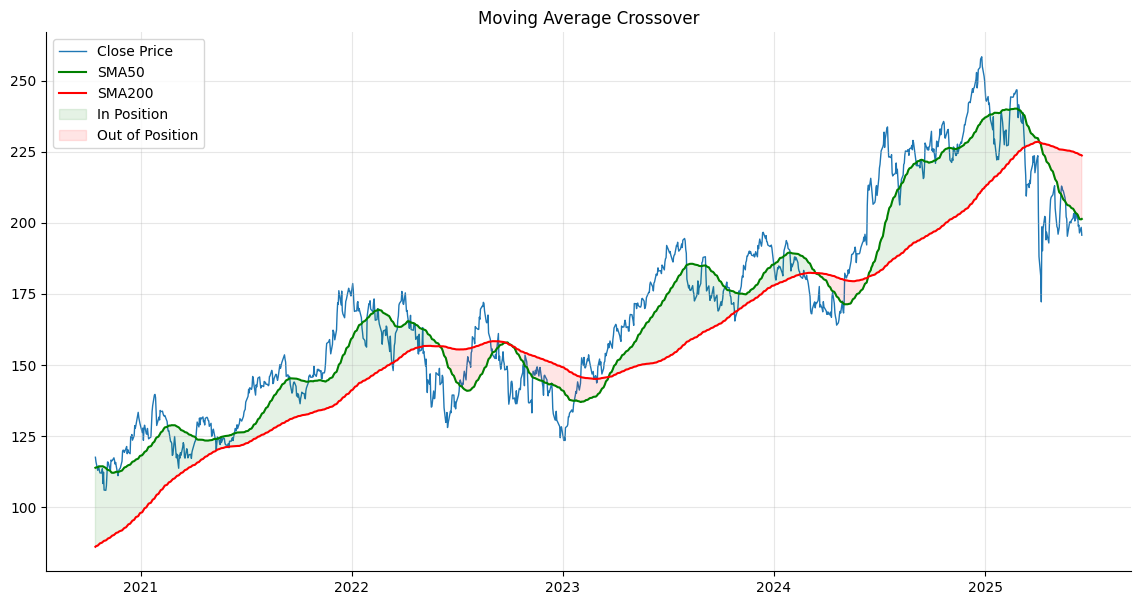

In [6]:
fig, ax = plt.subplots(figsize=(14,7))

ax.set_title('Moving Average Crossover')
ax.plot(df_aapl['Close'], label='Close Price', linestyle='-', linewidth=1, alpha=1, zorder=1)
ax.plot(df_aapl['SMA50'], label='SMA50', color='Green', alpha=1, zorder=2)
ax.plot(df_aapl['SMA200'], label='SMA200', color='Red', alpha=1, zorder=3)
ax.spines[["top", "right"]].set(visible=False)
ax.grid(alpha=0.3)

ax.fill_between(df_aapl.index,
                    df_aapl['SMA50'],
                    df_aapl['SMA200'],
                    where=(df_aapl['SMA50'] > df_aapl['SMA200']),
                    color='Green',
                    alpha=0.1,
                    label="In Position")

ax.fill_between(df_aapl.index,
                    df_aapl['SMA50'],
                    df_aapl['SMA200'],
                    where=(df_aapl['SMA50'] < df_aapl['SMA200']),
                    color='Red',
                    alpha=0.1,
                    label="Out of Position")          

ax.legend(loc='upper left')

plt.show;

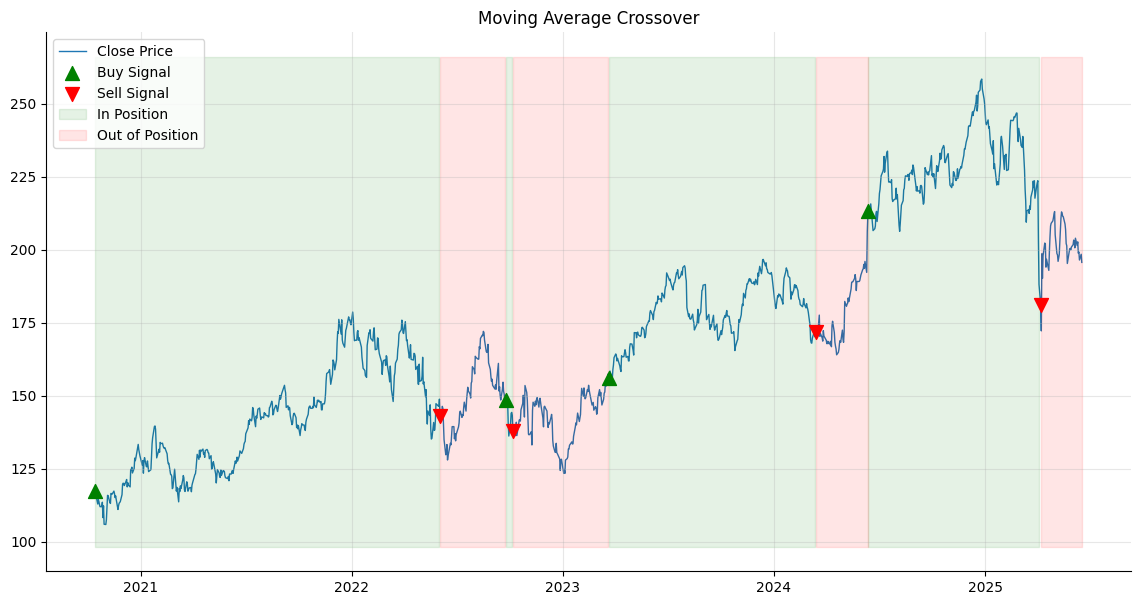

In [7]:
fig, ax = plt.subplots(figsize=(14,7))

ax.set_title('Moving Average Crossover')
ax.plot(df_aapl['Close'], label='Close Price', linestyle='-', linewidth=1, alpha=1, zorder=1)
ax.scatter(x=buy_markers.index, y=df_aapl['Close'].loc[buy_markers.index], marker='^', s=100, color='Green', label='Buy Signal', zorder=4)
ax.scatter(x=sell_markers.index, y=df_aapl['Close'].loc[sell_markers.index], marker='v', s=100, color='Red', label='Sell Signal', zorder=5)
ax.spines[["top", "right"]].set(visible=False)
ax.grid(alpha=0.3)

y_min, y_max = ax.get_ybound()

ax.fill_between(df_aapl.index,
                y_max,
                y_min,
                where=(df_aapl['SMA50'] > df_aapl['SMA200']),
                color='Green',
                alpha=0.1,
                label='In Position')

ax.fill_between(df_aapl.index,
                y_max,
                y_min,
                where=(df_aapl['SMA50'] < df_aapl['SMA200']),
                color='Red',
                alpha=0.1,
                label='Out of Position')

# Prevents duplicate keys being added to the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="upper left")

plt.show;

### Calculate Returns

In [8]:
df_aapl['Position'] = df_aapl['Signal'].shift(1)
df_aapl

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal,Position
Date,,,,,,,,,
2020-10-15,117.550018,118.027189,115.057037,115.612115,112559200,113.858164,86.063326,1,NaN
2020-10-16,115.904266,118.368042,115.699765,118.105106,115393800,113.961827,86.279743,1,1.0
2020-10-19,112.943832,117.267595,112.632210,116.819638,120639300,114.056629,86.484888,1,1.0
2020-10-20,114.433792,115.865311,112.603003,113.158081,124423700,114.149775,86.694618,1,1.0
2020-10-21,113.810547,115.602375,113.401536,113.615778,89946000,114.295751,86.902936,1,1.0
...,...,...,...,...,...,...,...,...,...
2025-06-11,198.779999,204.500000,198.410004,203.500000,60989900,202.312253,224.266182,0,0.0
2025-06-12,199.199997,199.679993,197.360001,199.080002,43904600,201.838299,224.131955,0,0.0
2025-06-13,196.449997,200.369995,195.699997,199.729996,51447300,201.295363,223.982284,0,0.0


In [9]:
df_aapl['Daily_Ret'] = df_aapl['Close'].pct_change()
df_aapl

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal,Position,Daily_Ret
Date,,,,,,,,,,
2020-10-15,117.550018,118.027189,115.057037,115.612115,112559200,113.858164,86.063326,1,NaN,NaN
2020-10-16,115.904266,118.368042,115.699765,118.105106,115393800,113.961827,86.279743,1,1.0,-0.014000
2020-10-19,112.943832,117.267595,112.632210,116.819638,120639300,114.056629,86.484888,1,1.0,-0.025542
2020-10-20,114.433792,115.865311,112.603003,113.158081,124423700,114.149775,86.694618,1,1.0,0.013192
2020-10-21,113.810547,115.602375,113.401536,113.615778,89946000,114.295751,86.902936,1,1.0,-0.005446
...,...,...,...,...,...,...,...,...,...,...
2025-06-11,198.779999,204.500000,198.410004,203.500000,60989900,202.312253,224.266182,0,0.0,-0.019194
2025-06-12,199.199997,199.679993,197.360001,199.080002,43904600,201.838299,224.131955,0,0.0,0.002113
2025-06-13,196.449997,200.369995,195.699997,199.729996,51447300,201.295363,223.982284,0,0.0,-0.013805


In [10]:
df_aapl['Strategy_Ret'] = df_aapl['Position'] * df_aapl['Daily_Ret']
df_aapl

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal,Position,Daily_Ret,Strategy_Ret
Date,,,,,,,,,,,
2020-10-15,117.550018,118.027189,115.057037,115.612115,112559200,113.858164,86.063326,1,NaN,NaN,NaN
2020-10-16,115.904266,118.368042,115.699765,118.105106,115393800,113.961827,86.279743,1,1.0,-0.014000,-0.014000
2020-10-19,112.943832,117.267595,112.632210,116.819638,120639300,114.056629,86.484888,1,1.0,-0.025542,-0.025542
2020-10-20,114.433792,115.865311,112.603003,113.158081,124423700,114.149775,86.694618,1,1.0,0.013192,0.013192
2020-10-21,113.810547,115.602375,113.401536,113.615778,89946000,114.295751,86.902936,1,1.0,-0.005446,-0.005446
...,...,...,...,...,...,...,...,...,...,...,...
2025-06-11,198.779999,204.500000,198.410004,203.500000,60989900,202.312253,224.266182,0,0.0,-0.019194,-0.000000
2025-06-12,199.199997,199.679993,197.360001,199.080002,43904600,201.838299,224.131955,0,0.0,0.002113,0.000000
2025-06-13,196.449997,200.369995,195.699997,199.729996,51447300,201.295363,223.982284,0,0.0,-0.013805,-0.000000


In [11]:
df_aapl['Daily_Cum_Returns'] = (1 + df_aapl['Daily_Ret']).cumprod()
df_aapl

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal,Position,Daily_Ret,Strategy_Ret,Daily_Cum_Returns
Date,,,,,,,,,,,,
2020-10-15,117.550018,118.027189,115.057037,115.612115,112559200,113.858164,86.063326,1,NaN,NaN,NaN,NaN
2020-10-16,115.904266,118.368042,115.699765,118.105106,115393800,113.961827,86.279743,1,1.0,-0.014000,-0.014000,0.986000
2020-10-19,112.943832,117.267595,112.632210,116.819638,120639300,114.056629,86.484888,1,1.0,-0.025542,-0.025542,0.960815
2020-10-20,114.433792,115.865311,112.603003,113.158081,124423700,114.149775,86.694618,1,1.0,0.013192,0.013192,0.973490
2020-10-21,113.810547,115.602375,113.401536,113.615778,89946000,114.295751,86.902936,1,1.0,-0.005446,-0.005446,0.968188
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-11,198.779999,204.500000,198.410004,203.500000,60989900,202.312253,224.266182,0,0.0,-0.019194,-0.000000,1.691025
2025-06-12,199.199997,199.679993,197.360001,199.080002,43904600,201.838299,224.131955,0,0.0,0.002113,0.000000,1.694598
2025-06-13,196.449997,200.369995,195.699997,199.729996,51447300,201.295363,223.982284,0,0.0,-0.013805,-0.000000,1.671203


In [12]:
df_aapl['Strategy_Cum_Returns'] = (1 + df_aapl['Strategy_Ret']).cumprod()
df_aapl

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal,Position,Daily_Ret,Strategy_Ret,Daily_Cum_Returns,Strategy_Cum_Returns
Date,,,,,,,,,,,,,
2020-10-15,117.550018,118.027189,115.057037,115.612115,112559200,113.858164,86.063326,1,NaN,NaN,NaN,NaN,NaN
2020-10-16,115.904266,118.368042,115.699765,118.105106,115393800,113.961827,86.279743,1,1.0,-0.014000,-0.014000,0.986000,0.986000
2020-10-19,112.943832,117.267595,112.632210,116.819638,120639300,114.056629,86.484888,1,1.0,-0.025542,-0.025542,0.960815,0.960815
2020-10-20,114.433792,115.865311,112.603003,113.158081,124423700,114.149775,86.694618,1,1.0,0.013192,0.013192,0.973490,0.973490
2020-10-21,113.810547,115.602375,113.401536,113.615778,89946000,114.295751,86.902936,1,1.0,-0.005446,-0.005446,0.968188,0.968188
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-11,198.779999,204.500000,198.410004,203.500000,60989900,202.312253,224.266182,0,0.0,-0.019194,-0.000000,1.691025,1.059175
2025-06-12,199.199997,199.679993,197.360001,199.080002,43904600,201.838299,224.131955,0,0.0,0.002113,0.000000,1.694598,1.059175
2025-06-13,196.449997,200.369995,195.699997,199.729996,51447300,201.295363,223.982284,0,0.0,-0.013805,-0.000000,1.671203,1.059175


## Analysis of Strategy Performance

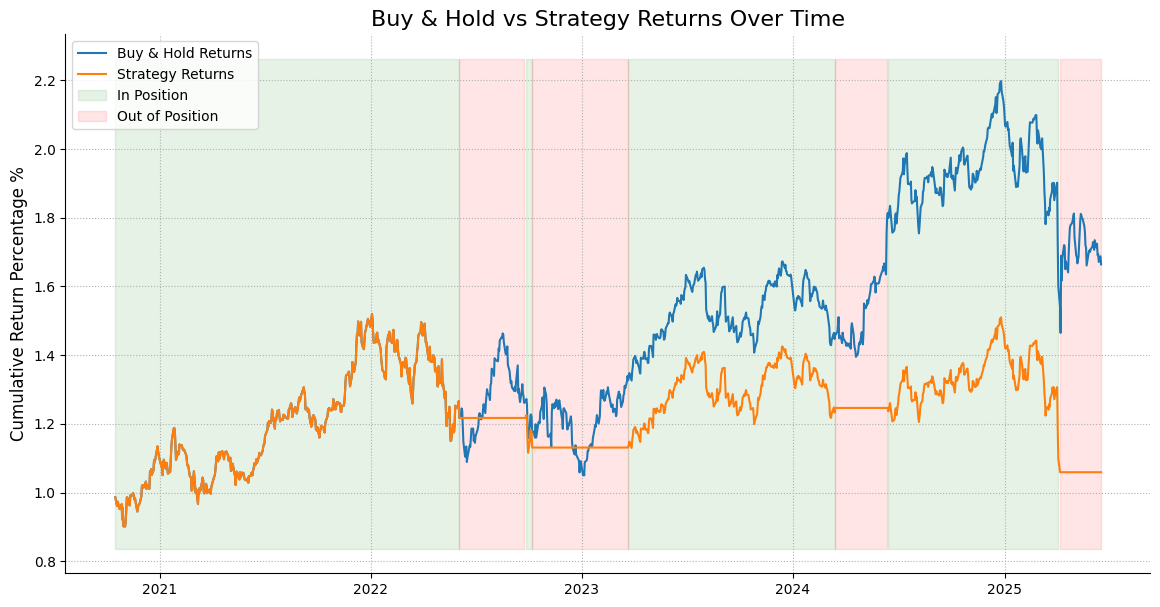

In [13]:
fig, ax = plt.subplots(figsize=(14,7))
# ax.plot(df_aapl['Close'])
ax.set_title("Buy & Hold vs Strategy Returns Over Time", fontsize=16)
ax.set_ylabel("Cumulative Return Percentage %", fontsize=12)
ax.plot(df_aapl['Daily_Cum_Returns'], label='Buy & Hold Returns')
ax.plot(df_aapl['Strategy_Cum_Returns'], label='Strategy Returns')
ax.grid(alpha=1, linestyle=":")
ax.spines[["top", "right"]].set(visible=False)

y_min, y_max = ax.get_ybound()

ax.fill_between(df_aapl.index,
                y_max,
                y_min,
                where=(df_aapl['SMA50'] > df_aapl['SMA200']),
                color='Green',
                alpha=0.1,
                label='In Position')

ax.fill_between(df_aapl.index,
                y_max,
                y_min,
                where=(df_aapl['SMA50'] < df_aapl['SMA200']),
                color='Red',
                alpha=0.1,
                label='Out of Position')

ax.legend(loc="upper left")

plt.show;

## Writing a function to backtest

In [14]:
df_aapl.Close.to_frame()

,Close
Date,
2020-10-15,117.550018
2020-10-16,115.904266
2020-10-19,112.943832
2020-10-20,114.433792
2020-10-21,113.810547
...,...
2025-06-11,198.779999
2025-06-12,199.199997
2025-06-13,196.449997


In [55]:
def backtest_ma_strategy(df: pd.DataFrame = pd.DataFrame(),
                         ticker: str = "AAPL",
                         start_date: str = str(date.today().year - 5) + "-01-01",
                         end_date: str = str(date.today()),
                         short_window: int = 50,
                         long_window: int = 200,
):
    """
    Backtest a simple moving average trading strategy.
    """

    if df.empty:
        if ticker == None:
            print('Ticker Needed')
            return

        # Download Ticker Price Data
        df_backtest = yf.download(ticker, start=start_date, end=end_date).droplevel(axis=1, level=1)
    else:
        df_backtest = df.copy()

    # Short Signal
    df_backtest['short_ma'] = df_backtest['Close'].rolling(window=short_window).mean()
    # Long Signal
    df_backtest['long_ma'] = df_backtest['Close'].rolling(window=long_window).mean()
    # Drop rows where signals are missing due to lack of data
    df_backtest.dropna(inplace=True)

    # When the short window closes above the long window, flag a buy signal
    df_backtest['signal'] = (df_backtest['short_ma'] > df_backtest['long_ma']) * 1
    # Position the days trade based on the previous close signal
    df_backtest['position'] = df_backtest['signal'].shift(1)

    # The daily price change of the stock
    df_backtest['daily_returns'] = df_backtest['Close'].pct_change()
    # The price change of the stock, only accounting for days we are in position
    df_backtest['strategy_returns'] = df_backtest['position'] * df_backtest['daily_returns']

    # The return on investment if we had bought and held from the start date
    df_backtest['daily_cum_returns'] = (1 + df_backtest['daily_returns']).cumprod()
    # The return on investment if we had traded and held the the stock signal
    df_backtest['strategy_cum_returns'] = (1 + df_backtest['strategy_returns']).cumprod()

    return df_backtest


In [39]:
df_test = backtest_ma_strategy()
df_test

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,short_ma,long_ma,signal,position,daily_returns,strategy_returns,daily_cum_returns,strategy_cum_returns
Date,,,,,,,,,,,,,
2020-10-15,117.550018,118.027189,115.057037,115.612115,112559200,113.858167,86.063326,1,NaN,NaN,NaN,NaN,NaN
2020-10-16,115.904266,118.368042,115.699765,118.105106,115393800,113.961830,86.279743,1,1.0,-0.014000,-0.014000,0.986000,0.986000
2020-10-19,112.943840,117.267603,112.632217,116.819646,120639300,114.056631,86.484888,1,1.0,-0.025542,-0.025542,0.960815,0.960815
2020-10-20,114.433792,115.865311,112.603003,113.158081,124423700,114.149778,86.694618,1,1.0,0.013192,0.013192,0.973490,0.973490
2020-10-21,113.810547,115.602375,113.401536,113.615778,89946000,114.295754,86.902936,1,1.0,-0.005446,-0.005446,0.968188,0.968188
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-11,198.779999,204.500000,198.410004,203.500000,60989900,202.312253,224.266182,0,0.0,-0.019194,-0.000000,1.691025,1.059176
2025-06-12,199.199997,199.679993,197.360001,199.080002,43904600,201.838299,224.131955,0,0.0,0.002113,0.000000,1.694598,1.059176
2025-06-13,196.449997,200.369995,195.699997,199.729996,51447300,201.295363,223.982284,0,0.0,-0.013805,-0.000000,1.671203,1.059176


## Risk / Return

In [40]:
# Our return is the average daily return on investment
# Our risk is how far this is likely to swing from day to day, i.e. volatility
summary = df_aapl[["Daily_Ret", "Strategy_Ret"]].agg(["mean", "std"]).T
summary.columns = ["Return", "Risk"]
summary

,Return,Risk
Price,,
Daily_Ret,0.000598,0.018108
Strategy_Ret,0.000151,0.014253


In [41]:
# Annualizing risk and reward
# There are roughly 252 business days per year
ann_summary = summary * (252, np.sqrt(252))
ann_summary

,Return,Risk
Price,,
Daily_Ret,0.150660,0.287463
Strategy_Ret,0.038069,0.226263


## Sharpe Ratio

In [42]:
# The risk free return is the return on an investment that is deemed to be risk free
# These are usually government bonds given by stable countries such as the US, Germany, or the UK
ann_risk_free_return = 0.05

In [43]:
# The Sharpe ratio compares investment reward against risk
# The higher the Sharpe ratio, the better the investment as the reward to risk ratio is stronger
ann_summary["Sharpe"] = (ann_summary["Return"] - 0.05) / ann_summary["Risk"]
ann_summary

,Return,Risk,Sharpe
Price,,,
Daily_Ret,0.150660,0.287463,0.350168
Strategy_Ret,0.038069,0.226263,-0.052731


* Our Strategy isn't a very good one, we would have been better to buy and hold the AAPL stock instead of trying to trade it using this method.
* Whilst our strategy is slightly less risky, the returns are much worse.
* I believe that this is due to missing out on initial price movements as the trend lines we use to signal trades lag behind actual price movements

### Writing a function to summarize annual returns and sharpe ratio

In [44]:
def get_summary(df: pd.DataFrame = pd.DataFrame()):

    summary = df.agg(["mean", "std"]).T.copy()
    summary.columns = ["Return", "Risk"]


    return summary

In [45]:
def get_ann_summary(df: pd.DataFrame = pd.DataFrame(),
                       periods_in_year: int = 252,
                       rfr: float = 0.05):

    ann_summary = get_summary(df) * (periods_in_year, np.sqrt(periods_in_year))
    ann_summary["Sharpe"] = (ann_summary["Return"] - rfr) / ann_summary["Risk"]


    return ann_summary

    

In [46]:
get_summary(df_aapl[['Daily_Ret', "Strategy_Ret"]])

,Return,Risk
Price,,
Daily_Ret,0.000598,0.018108
Strategy_Ret,0.000151,0.014253


In [47]:
get_ann_summary(df_aapl[['Daily_Ret', "Strategy_Ret"]])

,Return,Risk,Sharpe
Price,,,
Daily_Ret,0.150660,0.287463,0.350168
Strategy_Ret,0.038069,0.226263,-0.052731


## Backtesting through rolling windows

In [67]:
# We are creating windows in time of 1 year moving along month by month
# + 200 as this covers the period to determing the rolling 200 day window for which data will be null due to no signals
window_size=252 + 200
step=21
windows=[]
for i in range(0, len(df_aapl) - window_size, step):
    
    windows.append(df_aapl.iloc[i:i+window_size]["Close"].to_frame())

In [68]:
windows[10]

,Close
Date,
2021-08-17,147.198990
2021-08-18,143.445251
2021-08-19,143.778488
2021-08-20,145.238846
2021-08-23,146.728546
...,...
2023-05-26,173.690964
2023-05-30,175.542419
2023-05-31,175.492920


In [69]:
backtest_results = []

for window in windows:

    df_test = backtest_ma_strategy(window)
    

df_test

,Close,short_ma,long_ma,signal,position,daily_returns,strategy_returns,daily_cum_returns,strategy_cum_returns
Date,,,,,,,,,
2024-06-04,193.445328,177.084527,180.152420,0,NaN,NaN,NaN,NaN,NaN
2024-06-05,194.958237,177.587205,180.262244,0,0.0,0.007821,0.0,1.007821,1.000000
2024-06-06,193.574707,178.084875,180.358457,0,0.0,-0.007097,-0.0,1.000669,1.000000
2024-06-07,195.973495,178.558953,180.459774,0,0.0,0.012392,0.0,1.013069,1.000000
2024-06-10,192.221039,178.994362,180.523046,0,0.0,-0.019148,-0.0,0.993671,1.000000
...,...,...,...,...,...,...,...,...,...
2025-06-02,201.699997,204.964102,225.049983,0,0.0,0.004232,0.0,1.042672,0.849841
2025-06-03,203.270004,204.669819,224.961616,0,0.0,0.007784,0.0,1.050788,0.849841
2025-06-04,202.820007,204.317401,224.856052,0,0.0,-0.002214,-0.0,1.048462,0.849841


In [70]:
len(df_test)

253

In [75]:
test = backtest_ma_strategy(window.Close.to_frame())
test

,Close,short_ma,long_ma,signal,position,daily_returns,strategy_returns,daily_cum_returns,strategy_cum_returns
Date,,,,,,,,,
2024-06-04,193.445328,177.084527,180.152420,0,NaN,NaN,NaN,NaN,NaN
2024-06-05,194.958237,177.587205,180.262244,0,0.0,0.007821,0.0,1.007821,1.000000
2024-06-06,193.574707,178.084875,180.358457,0,0.0,-0.007097,-0.0,1.000669,1.000000
2024-06-07,195.973495,178.558953,180.459774,0,0.0,0.012392,0.0,1.013069,1.000000
2024-06-10,192.221039,178.994362,180.523046,0,0.0,-0.019148,-0.0,0.993671,1.000000
...,...,...,...,...,...,...,...,...,...
2025-06-02,201.699997,204.964102,225.049983,0,0.0,0.004232,0.0,1.042672,0.849841
2025-06-03,203.270004,204.669819,224.961616,0,0.0,0.007784,0.0,1.050788,0.849841
2025-06-04,202.820007,204.317401,224.856052,0,0.0,-0.002214,-0.0,1.048462,0.849841


In [74]:
get_ann_summary(backtest_ma_strategy(window)[["daily_returns", "strategy_returns"]])

,Return,Risk,Sharpe
daily_returns,0.106648,0.33091,0.171188
strategy_returns,-0.132831,0.24247,-0.754036


In [78]:
df_aapl.loc['2024-06-05': '2025-06-06']

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal,Position,Daily_Ret,Strategy_Ret,Daily_Cum_Returns,Strategy_Cum_Returns
Date,,,,,,,,,,,,,
2024-06-05,194.958237,195.983441,193.962892,194.490423,54156800,177.587205,180.262244,0,0.0,0.007821,0.0,1.658513,1.246322
2024-06-06,193.574707,195.585308,193.266152,194.779081,41181800,178.084875,180.358457,0,0.0,-0.007097,-0.0,1.646743,1.246322
2024-06-07,195.973495,196.023266,193.236296,193.743917,53103900,178.558953,180.459774,0,0.0,0.012392,0.0,1.667150,1.246322
2024-06-10,192.221039,196.381589,191.255553,195.983442,97262100,178.994362,180.523046,0,0.0,-0.019148,-0.0,1.635228,1.246322
2024-06-11,206.185730,206.195693,192.728675,192.748571,172373300,179.737891,180.679638,0,0.0,0.072649,0.0,1.754026,1.246322
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-02,201.699997,202.130005,200.119995,200.279999,35423300,204.964102,225.049983,0,0.0,0.004232,0.0,1.715865,1.059175
2025-06-03,203.270004,203.770004,200.960007,201.350006,46381600,204.669819,224.961616,0,0.0,0.007784,0.0,1.729221,1.059175
2025-06-04,202.820007,206.240005,202.100006,202.910004,43604000,204.317401,224.856052,0,0.0,-0.002214,-0.0,1.725393,1.059175


#### Writing a Function to Backtest Through Rolling Windows

In [134]:
def rolling_backtest(df: pd.DataFrame,
                     backtest_strategy: callable,
                     window_size: int = 252,
                     step: int = 21):

    # Initialize summary variables
    period_start = []
    period_end = []
    hold_return = []
    hold_risk = []
    hold_sharpe = []
    strategy_return = []
    strategy_risk = []
    strategy_sharpe = []

    # Split the dataset into windows and backtest each window individually
    for i in range(0, len(df) - window_size, step):
        
        # Create a window of window_size starting at our stepping point
        df_window = df.iloc[i:i+window_size].copy()

        # Backtest the window using the given strategy
        df_test = backtest_strategy(df_window)

        # Summarize the backtested strategy
        df_summary = get_ann_summary(df_test[["daily_returns", "strategy_returns"]])

        # Capture strategy summarizations
        period_start.append(df_test.index[1])
        period_end.append(df_test.index[-1])
        hold_return.append(df_summary.loc["daily_returns", "Return"])
        hold_risk.append(df_summary.loc["daily_returns", "Risk"])
        hold_sharpe.append(df_summary.loc["daily_returns", "Sharpe"])
        strategy_return.append(df_summary.loc["strategy_returns", "Return"])
        strategy_risk.append(df_summary.loc["strategy_returns", "Risk"])
        strategy_sharpe.append(df_summary.loc["strategy_returns", "Sharpe"])

    # Return a summary dataframe detailing strategy performance across windows
    df_rolling_backtest = pd.DataFrame({"period_start": period_start, 
                                        "period_end": period_end, 
                                        "hold_returns": hold_return, 
                                        "hold_risk": hold_risk, 
                                        "hold_sharpe": hold_sharpe, 
                                        "strategy_returns": strategy_return, 
                                        "strategy_risk": strategy_risk, 
                                        "strategy_sharpe": strategy_sharpe})

    return df_rolling_backtest

In [135]:
window

,Close
Date,
2023-08-18,172.993576
2023-08-21,174.331985
2023-08-22,175.710083
2023-08-23,179.566711
2023-08-24,174.867386
...,...
2025-06-02,201.699997
2025-06-03,203.270004
2025-06-04,202.820007


In [139]:
df_rolling_backtest = rolling_backtest(df_aapl.Close.to_frame(),
                      backtest_ma_strategy,
                      window_size = 252 + 200)
df_rolling_backtest

,period_start,period_end,hold_returns,hold_risk,hold_sharpe,strategy_returns,strategy_risk,strategy_sharpe
0,2021-08-03,2022-08-02,0.146156,0.302092,0.318299,0.041964,0.273318,-0.029403
1,2021-09-01,2022-08-31,0.087432,0.306856,0.121984,-0.003411,0.268001,-0.199293
2,2021-10-01,2022-09-30,0.032890,0.319273,-0.053591,-0.020045,0.267724,-0.261630
3,2021-11-01,2022-10-31,0.085643,0.337384,0.105646,-0.063439,0.267766,-0.423650
4,2021-12-01,2022-11-30,-0.041400,0.356617,-0.256297,-0.165714,0.258554,-0.834308
5,2021-12-31,2022-12-30,-0.246906,0.356262,-0.833394,-0.244534,0.243524,-1.209466
6,2022-02-01,2023-02-01,-0.116527,0.351444,-0.473837,-0.229675,0.223718,-1.250125
7,2022-03-03,2023-03-03,-0.029584,0.353712,-0.224996,-0.185186,0.212846,-1.104956
8,2022-04-01,2023-04-03,0.016260,0.346554,-0.097359,-0.184511,0.194976,-1.202764
9,2022-05-03,2023-05-03,0.120982,0.337304,0.210439,-0.079789,0.178486,-0.727163


In [138]:
df_rolling_backtest[["hold_sharpe", "strategy_sharpe"]]

,hold_sharpe,strategy_sharpe
0,0.318299,-0.029403
1,0.121984,-0.199293
2,-0.053591,-0.261630
3,0.105646,-0.423650
4,-0.256297,-0.834308
5,-0.833394,-1.209466
6,-0.473837,-1.250125
7,-0.224996,-1.104956
8,-0.097359,-1.202764
9,0.210439,-0.727163


## Applying recency weighting to backtesting

In [ ]:
decay_rate = 0.95
weights = np.array([decay_rate**i for i in reversed(range(len(df_backtest)))])
weights

In [ ]:
df_backtest

In [ ]:
(df_backtest.mul(weights, axis=0) / np.sum(weights)).plot()

## Paramenter Optimization using a gridsearch